### Storage Cost Model

\begin{align}
C_{Tn}=[M+y=1nGy]xCxC_{CY}+U_n*C_I
\end{align}

The difference between purchasing on-premises storage and consuming public cloud storage comes down to the difference between capex and opex models. 

__Capex, or capital expenditures__, are incurred when a company or government organization spends money to invest in new equipment. 

__Opex, or operating expenses__, take place on a regular basis and represent a part of the day-to-day operation of the company or government organization. 

Investing in new equipment is called capex, while consuming storage in the cloud is mostly opex, since bills are paid monthly and based on usage (a cost for operating the cloud, rather than the physical hardware).

- $C_T$ is the storage cost of a given year, $n$
- $M$ is the initial volume of data migrated from storage
- $G$ is the volume of growth based on past experience and future estimates for years 1-3, 4-6 and 7-9
- $C$ is the current storage costs per \\$/TB/year, i.e. \\$12/TB/year = \\$12000/PB/year
- $C_C$ is the change in cost represented as a decrease of 25\% over today's cost every 3 years e.g. $C_C$ in years 1-3 is 1, representing \\$12/TB/yr, $C_C$ in years 4-6 is .75, representing \\$9/12/TB/yr, $C_C$ in years 7-9 is .5, representing \\$6/12/TB/yr
- $Y$ is the year, one of 1-3, 4-6, 7-9
- $U$ is the amount of data uploaded each year
- $C_I$ is the ingest cost of 6% of one year's storage cost for the volume in that year
- $C_E$ is the egress cost per year based on the estimate 2\% of the data being recalled (not included in the above equation)

### Compute Cost Model

- TODO: design
- TODO: ingest current retail prices from Azure, GCP and AWS

- Azure API endpoint
https://prices.azure.com/api/retail/prices

- example to pull 'Virtual Machines' prices
https://prices.azure.com/api/retail/prices?$filter=serviceName eq 'Virtual Machines'

we'll need to create a base url = https://prices.azure.com/api/retail/prices

- Azure Computer
https://prices.azure.com/api/retail/prices?$filter=serviceFamily eq 'Compute'

https://azure.microsoft.com/en-in/pricing/calculator/



In [1]:
import requests
import json 

In [164]:
# setup the URL part
base_url = "https://prices.azure.com/api/retail/prices?$"
query = "filter=serviceName eq 'Virtual Machines'"
query2 = "filter=serviceFamily eq 'Compute'"

In [166]:
# build and execute the request using the base URL, plus endpoint, plus query parameters
azure_url = base_url + query
azure_url2 = base_url + query2
#response = requests.get(azure_url).json()
response = requests.get(azure_url)
response2 = requests.get(azure_url2)
check = response2.status_code
print(check)

200


In [66]:
if response.status_code == 200:
  print('Success')
  #response_string = json.loads(response.text) # load the string version of the response to a json object


Success


In [58]:
headers = response.headers['Content-Type']
print(headers)

application/json; charset=utf-8


In [167]:
j = response2.json()
type(j)

dict

In [168]:
j.keys()

dict_keys(['BillingCurrency', 'CustomerEntityId', 'CustomerEntityType', 'Items', 'NextPageLink', 'Count'])

In [173]:
#j['Items']
data = pd.DataFrame.from_dict(j['Items'])

In [174]:
last_url = response2.url
print(last_url)

https://prices.azure.com/api/retail/prices?$filter=serviceFamily%20eq%20'Compute'


In [214]:
import pandas as pd
pd.set_option('display.max_columns',100) 
pd.set_option('display.max_rows', 1000)
response2

<Response [200]>

In [210]:
data.head(5)


,currencyCode,tierMinimumUnits,retailPrice,unitPrice,armRegionName,location,effectiveStartDate,meterId,meterName,productId,skuId,productName,skuName,serviceName,serviceId,serviceFamily,unitOfMeasure,type,isPrimaryMeterRegion,armSkuName,reservationTerm
0,USD,0.0,0.062988,0.062988,uknorth,UK North,2019-10-16T00:00:00Z,0001e46a-9285-5fa8-b48a-240e307a24f7,A3 Spot,DZH318Z0BPVJ,DZH318Z0BPVJ/018M,Virtual Machines A Series Windows,A3 Spot,Virtual Machines,DZH313Z7MMC8,Compute,1 Hour,DevTestConsumption,True,Standard_A3,NaN
1,USD,0.0,0.190000,0.190000,uknorth,UK North,2019-10-16T00:00:00Z,0001e46a-9285-5fa8-b48a-240e307a24f7,A3 Spot,DZH318Z0BPVJ,DZH318Z0BPVJ/018M,Virtual Machines A Series Windows,A3 Spot,Virtual Machines,DZH313Z7MMC8,Compute,1 Hour,Consumption,True,Standard_A3,NaN
2,USD,0.0,0.023600,0.023600,westindia,IN West,2021-02-01T00:00:00Z,000419bc-6006-53ea-8976-1644249b9728,D2 v4 Low Priority,DZH318Z0D1L4,DZH318Z0D1L4/01TB,Virtual Machines Dv4 Series,D2 v4 Low Priority,Virtual Machines,DZH313Z7MMC8,Compute,1 Hour,Consumption,True,Standard_D2_v4,NaN
3,USD,0.0,1.482000,1.482000,northcentralus,US North Central,2018-09-01T00:00:00Z,0008a792-d49f-4f13-a461-9c9f24e92ccf,D14 v2/DS14 v2 - Expired,DZH318Z0BPSP,DZH318Z0BPSP/001D,Virtual Machines Dv2 promo Series,D14 v2,Virtual Machines,DZH313Z7MMC8,Compute,1 Hour,Consumption,True,Standard_D14_v2_Promo,NaN
4,USD,0.0,1.482000,1.482000,northcentralus,US North Central,2018-09-01T00:00:00Z,0008a792-d49f-4f13-a461-9c9f24e92ccf,DS14 v2 - Expired,DZH318Z0BPSQ,DZH318Z0BPSQ/000Z,Virtual Machines DSv2 promo Series,DS14 v2,Virtual Machines,DZH313Z7MMC8,Compute,1 Hour,Consumption,False,Standard_DS14_v2_Promo,NaN


In [211]:
dropped_data = data.drop(['currencyCode', 'tierMinimumUnits', 'effectiveStartDate', 'meterId', 'productId', 'skuId', 'serviceName', 'serviceFamily', 'type', 'isPrimaryMeterRegion', 'reservationTerm'], axis=1)

In [212]:
dropped_data.shape

(100, 10)

In [216]:
dropped_data['location']

0             UK North
1             UK North
2              IN West
3     US North Central
4     US North Central
5             BR South
6           US Central
7              EU West
8              EU West
9              IN West
10           US Gov TX
11          AE Central
12             US East
13             ZA West
14             ZA West
15             JA East
16             JA East
17        AU Southeast
18        AU Southeast
19            EU North
20            EU North
21          AE Central
22        AP Southeast
23        AP Southeast
24             AU East
25             AU East
26           US Gov AZ
27           US Gov AZ
28           US Gov AZ
29             JA West
30             JA West
31          CA Central
32          CA Central
33            BR South
34            BR South
35    US South Central
36    US South Central
37    US South Central
38            IN South
39           US Gov AZ
40            IN South
41            IN South
42            AE North
43         

In [195]:
dropped_data.dtypes

retailPrice      float64
unitPrice        float64
armRegionName     object
location          object
meterName         object
productName       object
skuName           object
serviceId         object
unitOfMeasure     object
armSkuName        object
dtype: object

In [207]:
df1 = pd.DataFrame({'armRegionName': eastus1})

NameError: name 'eastus1' is not defined

In [196]:
dropped_data.head()
dropped_data.tail()
dropped_data.sample(5)

,retailPrice,unitPrice,armRegionName,location,meterName,productName,skuName,serviceId,unitOfMeasure,armSkuName
66,0.655000,0.655000,australiacentral,AU Central,A8m v2,Virtual Machines Av2 Series,A8m v2,DZH313Z7MMC8,1 Hour,Standard_A8m_v2
59,0.723000,0.723000,westus2,US West 2,D64ds v4 Low Priority,Virtual Machines Ddsv4 Series,D64ds v4 Low Priority,DZH313Z7MMC8,1 Hour,Standard_D64ds_v4
46,0.605000,0.605000,westus2,US West 2,E48s v3 Low Priority,Virtual Machines ESv3 Series Windows,E48s v3 Low Priority,DZH313Z7MMC8,1 Hour,Standard_E48s_v3
56,0.194661,0.194661,southafricawest,ZA West,E16ds v4 Spot,Virtual Machines Edsv4 Series Windows,E16ds v4 Spot,DZH313Z7MMC8,1 Hour,Standard_E16ds_v4
20,0.150400,0.150400,northeurope,EU North,F4s v2 Low Priority,Cloud Services FSv2 Series,F4s v2 Low Priority,DZH31671GG75,1 Hour,


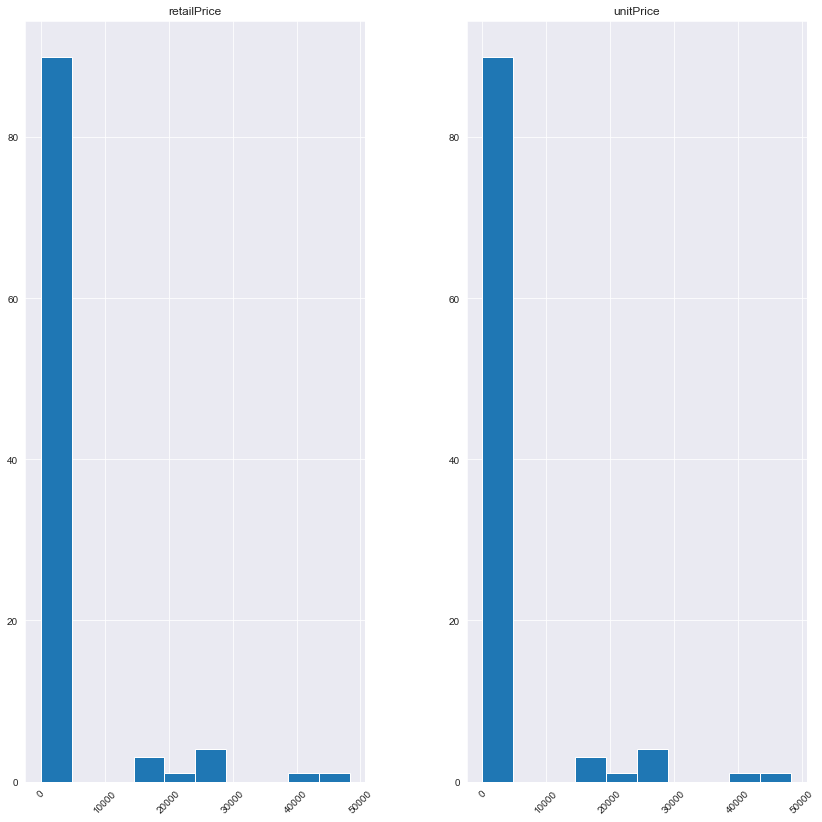

In [198]:
import numpy as np 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100) 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
dropped_data.hist(figsize=(14,14), xrot=45)
plt.show()

In [199]:
dropped_data.dtypes


retailPrice      float64
unitPrice        float64
armRegionName     object
location          object
meterName         object
productName       object
skuName           object
serviceId         object
unitOfMeasure     object
armSkuName        object
dtype: object

In [200]:
dropped_data.describe()

,retailPrice,unitPrice
count,100.000000,100.000000
mean,2617.144402,2617.144402
std,8435.287222,8435.287222
min,0.004000,0.004000
25%,0.305872,0.305872
50%,0.964288,0.964288
75%,4.185000,4.185000
max,48318.000000,48318.000000


In [201]:
dropped_data.describe(include='object')

,armRegionName,location,meterName,productName,skuName,serviceId,unitOfMeasure,armSkuName
count,100,100,100,100,100,100,100,100
unique,28,28,57,40,57,3,1,53
top,centralus,US Central,A3 Spot,Virtual Machines Edsv4 Series Windows,A3 Spot,DZH313Z7MMC8,1 Hour,
freq,15,15,4,10,4,92,100,6


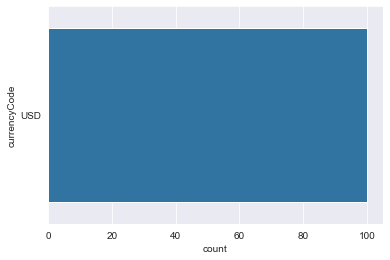

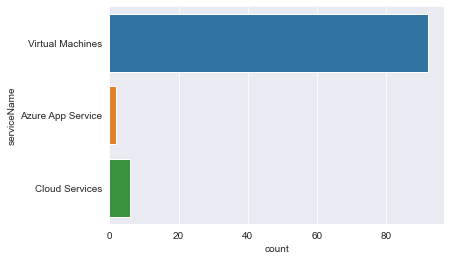

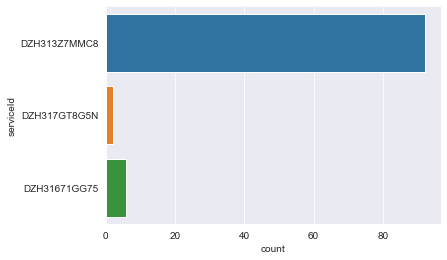

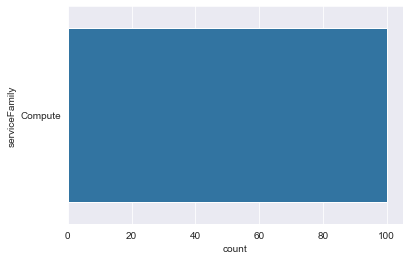

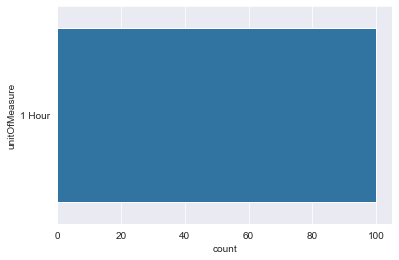

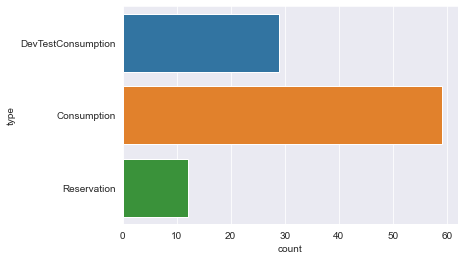

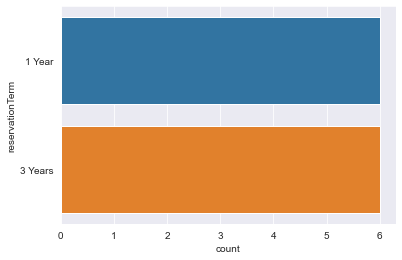

In [204]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()

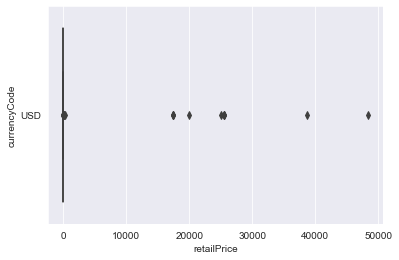

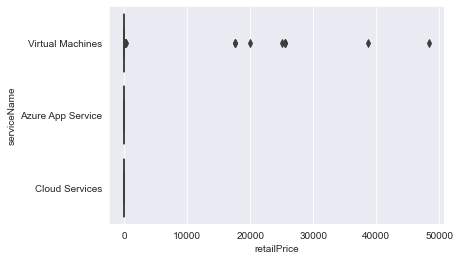

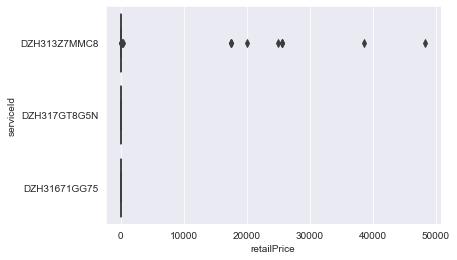

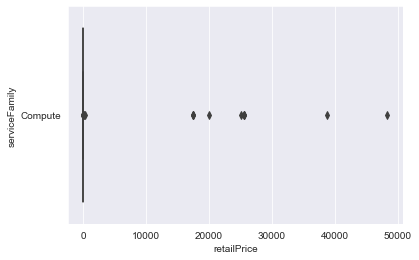

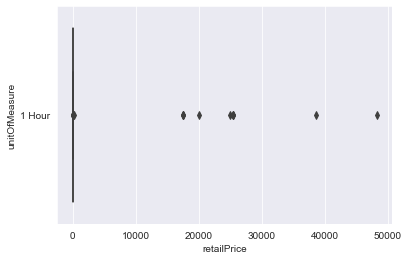

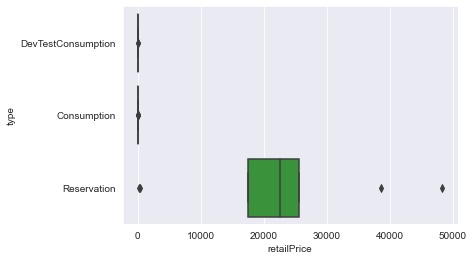

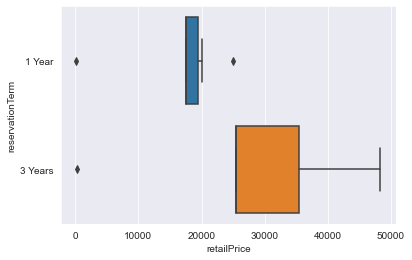

In [185]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.boxplot(y=column, x= 'retailPrice', data=data)
        plt.show()

In [186]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        display(data.groupby(column).mean())

,tierMinimumUnits,retailPrice,unitPrice,isPrimaryMeterRegion
currencyCode,,,,
USD,0.0,2617.144402,2617.144402,0.82


,tierMinimumUnits,retailPrice,unitPrice,isPrimaryMeterRegion
serviceName,,,,
Azure App Service,0.0,0.271446,0.271446,1.000000
Cloud Services,0.0,0.303150,0.303150,1.000000
Virtual Machines,0.0,2844.696504,2844.696504,0.804348


,tierMinimumUnits,retailPrice,unitPrice,isPrimaryMeterRegion
serviceId,,,,
DZH313Z7MMC8,0.0,2844.696504,2844.696504,0.804348
DZH31671GG75,0.0,0.303150,0.303150,1.000000
DZH317GT8G5N,0.0,0.271446,0.271446,1.000000


,tierMinimumUnits,retailPrice,unitPrice,isPrimaryMeterRegion
serviceFamily,,,,
Compute,0.0,2617.144402,2617.144402,0.82


,tierMinimumUnits,retailPrice,unitPrice,isPrimaryMeterRegion
unitOfMeasure,,,,
1 Hour,0.0,2617.144402,2617.144402,0.82


,tierMinimumUnits,retailPrice,unitPrice,isPrimaryMeterRegion
type,,,,
Consumption,0.0,2.849606,2.849606,0.830508
DevTestConsumption,0.0,2.562532,2.562532,0.862069
Reservation,0.0,21789.333333,21789.333333,0.666667


,tierMinimumUnits,retailPrice,unitPrice,isPrimaryMeterRegion
reservationTerm,,,,
1 Year,0.0,16272.166667,16272.166667,0.666667
3 Years,0.0,27306.500000,27306.500000,0.666667


In [187]:
corrs = data.corr()
corrs

,tierMinimumUnits,retailPrice,unitPrice,isPrimaryMeterRegion
tierMinimumUnits,NaN,NaN,NaN,NaN
retailPrice,NaN,1.000000,1.000000,-0.120901
unitPrice,NaN,1.000000,1.000000,-0.120901
isPrimaryMeterRegion,NaN,-0.120901,-0.120901,1.000000


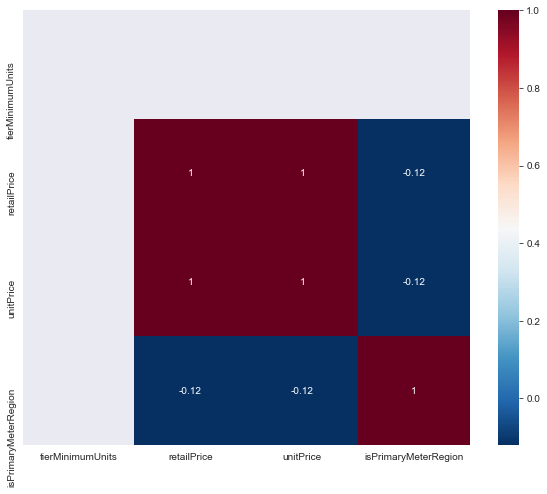

In [188]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

In [221]:
skus = pd.read_json('data/list-skus2.json')

In [222]:
skus

,apiVersions,capabilities,capacity,costs,family,kind,locationInfo,locations,name,resourceType,restrictions,size,tier
0,NaN,"[{'name': 'MaximumPlatformFaultDomainCount', '...",NaN,NaN,None,NaN,"[{'location': 'eastus', 'zoneDetails': [], 'zo...",[eastus],Classic,availabilitySets,[],None,None
1,NaN,"[{'name': 'MaximumPlatformFaultDomainCount', '...",NaN,NaN,None,NaN,"[{'location': 'eastus', 'zoneDetails': [], 'zo...",[eastus],Aligned,availabilitySets,[],None,None
2,NaN,"[{'name': 'MaximumPlatformFaultDomainCount', '...",NaN,NaN,None,NaN,"[{'location': 'eastus2', 'zoneDetails': [], 'z...",[eastus2],Classic,availabilitySets,[],None,None
3,NaN,"[{'name': 'MaximumPlatformFaultDomainCount', '...",NaN,NaN,None,NaN,"[{'location': 'eastus2', 'zoneDetails': [], 'z...",[eastus2],Aligned,availabilitySets,[],None,None
4,NaN,"[{'name': 'MaximumPlatformFaultDomainCount', '...",NaN,NaN,None,NaN,"[{'location': 'westus', 'zoneDetails': [], 'zo...",[westus],Classic,availabilitySets,[],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11765,NaN,"[{'name': 'MaxResourceVolumeMB', 'value': '192...",NaN,NaN,standardHBv3Family,NaN,"[{'location': 'CentralUSEUAP', 'zoneDetails': ...",[CentralUSEUAP],Standard_HB120-16rs_v3,virtualMachines,[],HB120-16rs_v3,Standard
11766,NaN,"[{'name': 'MaxResourceVolumeMB', 'value': '192...",NaN,NaN,standardHBv3Family,NaN,"[{'location': 'CentralUSEUAP', 'zoneDetails': ...",[CentralUSEUAP],Standard_HB120-32rs_v3,virtualMachines,[],HB120-32rs_v3,Standard
11767,NaN,"[{'name': 'MaxResourceVolumeMB', 'value': '192...",NaN,NaN,standardHBv3Family,NaN,"[{'location': 'CentralUSEUAP', 'zoneDetails': ...",[CentralUSEUAP],Standard_HB120-64rs_v3,virtualMachines,[],HB120-64rs_v3,Standard
11768,NaN,"[{'name': 'MaxResourceVolumeMB', 'value': '192...",NaN,NaN,standardHBv3Family,NaN,"[{'location': 'CentralUSEUAP', 'zoneDetails': ...",[CentralUSEUAP],Standard_HB120-96rs_v3,virtualMachines,[],HB120-96rs_v3,Standard
